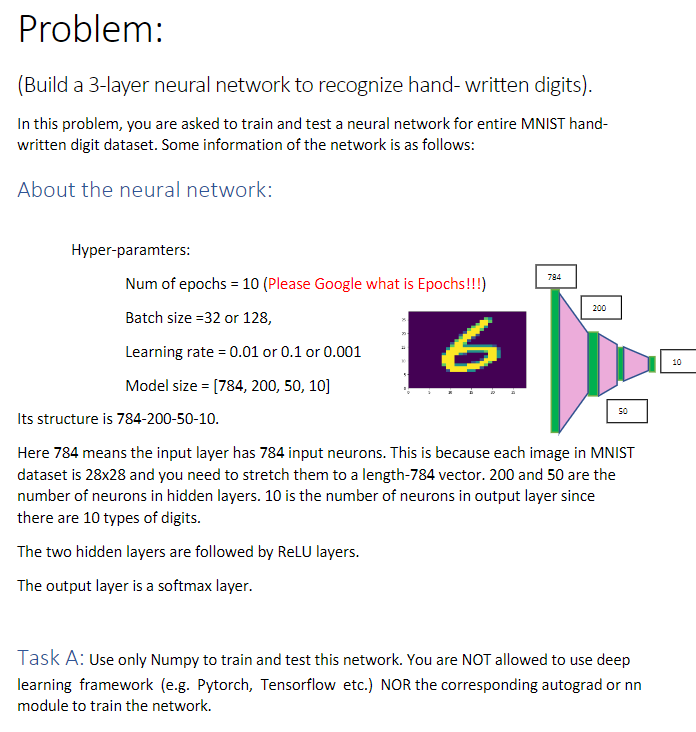

# For STEP One (A):

## A1.Run the following code to download the MNIST dataset (For numpy based task)


In [ ]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


## A2 The load() function will return the training and test dataset

In [ ]:
import numpy as np
from urllib import request
import gzip
import math
import pickle


def grad_softmax_crossentropy(X, y):
    m = y.shape[0]
    ones_for_answers = np.zeros_like(X)
    ones_for_answers[np.arange(len(X)), y] = 1

    p = np.exp(X) / np.exp(X).sum(axis=-1, keepdims=True)
    return (- ones_for_answers + p) / m

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels

'''==============================================
TRimg training image,
TRlab traing labels,
TSimg testing image,
TSlab testing label
================================================'''
TRimg,TRlab,TSimg,TSlab=load()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

arr_2d = np. reshape(TRimg[0], (28, 28))

60000 60000 10000 10000
784 60000 784 10000


In [ ]:
print(TRimg.shape)
Batch=TRimg[0:32]
print(Batch.shape)

(60000, 784)
(32, 784)


## A3 If you are interested in what the data looks like. You can run the following code to see.

6


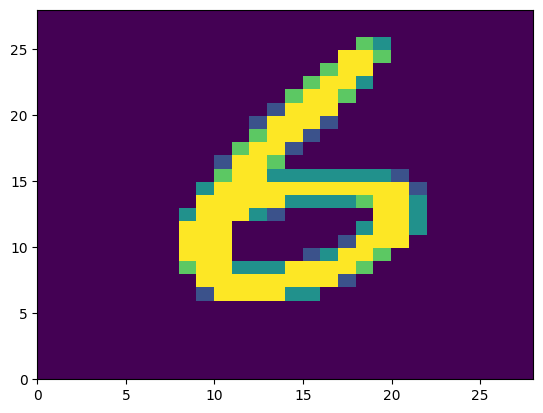

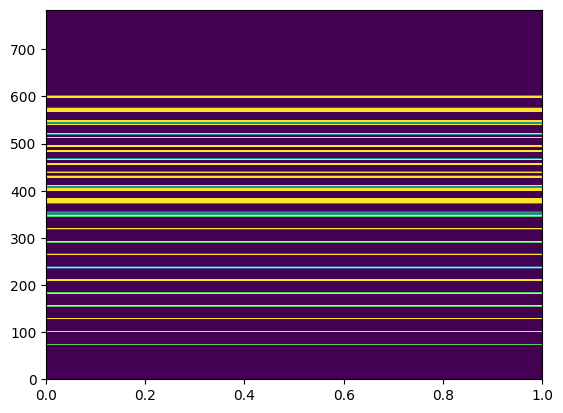

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()

plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

# Step 2: please design your 3-layer neural network below:

## model structure

2 hidden layers:

- 200 neurons in the first hidden layer (connected to the input layer).

- 50 neurons in the second hidden layer (connected to the output layer).

## Pay attention to "epoch" & "batch size". Please google what they are. 

In the demo, we process all the data in every iteration.

Usually you can not do this because most of the dataset is huge but your memory is limited.


So you need to divide the data into small groups (batch). Every time you only process one group. 

## Pay attention to the dataset. 

Do not use the test dataset in the training progress. (Yes. we did this in the demo. But you should not do this here and any other machine learning project. All the demos in the rest of this semester will strictly follow this rule.)

In [ ]:
# design your model here

# initialize parameters
hidden1 = 200
hidden2 = 50
D = 784
K = 10

W1 = 0.01 * np.random.randn(D, hidden1)
b1 = np.zeros((1, hidden1))
W2 = 0.01 * np.random.randn(hidden1, hidden2)
b2 = np.zeros((1, hidden2))
W3 = 0.01 * np.random.randn(hidden2, K)
b3 = np.zeros((1, K))

In [ ]:
# training

step_size = 1e-0 # learning rate
reg = 1e-3 #lambda
num_examples = TRimg.shape[0]

for i in range(1650):
  #forward propagation 
  #y=(x*w+b) 
  h1 = np.dot(TRimg, W1)
  h2 = h1 + b1
  h3 = np.maximum(0, h2)
  h4 = np.dot(h3, W2)
  h5 = h4 + b2
  h6 = np.maximum(0, h5)
  h7 = np.dot(h6, W3)
  h8 = h7 + b3
  #softmax()
  exp_scores = np.exp(h8)
  s = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

  #loss
  l1_all = -np.log(s[range(num_examples), TRlab])
  l1 = np.sum(l1_all) / num_examples
  l4 = np.sum(W1 * W1)
  l5 = reg * l4
  l6 = np.sum(W2 * W2)
  l7 = reg * l6
  l8 = np.sum(W3 * W3)
  l9 = reg * l8
  l2 = l1 + l5
  l3 = l2 + l7
  l = l3 + l9
  if i%10==0:
    print("iteration %d: loss %f" % (i, l))

  #back propagation
  s[range(num_examples), TRlab] -= 1
  dh8 = s
  dh8 /= num_examples
  dh7 = dh8
  db3 = np.sum(dh8, axis = 0, keepdims=True)
  dW3 = np.dot(h6.T, dh7)
  dh6 = np.dot(dh7, W3.T)
  dh5 = dh6
  dh5[h5 <= 0] = 0
  db2 = np.sum(dh5, axis = 0, keepdims=True)
  dh4 = dh5
  dW2 = np.dot(h3.T, dh4)
  dh3 = np.dot(dh4, W2.T)
  dh2 = dh3
  dh2[h2 <= 0] = 0
  db1 = np.sum(dh2, axis = 0, keepdims=True)
  dh1 = dh2
  dW1 = np.dot(TRimg.T, dh1)

  dl = 1
  dl3 = 1
  dl2 = 1
  dl4 = reg
  dl6 = reg
  dl8 = reg

  dW1 += 2 * dl4 * W1
  dW2 += 2 * dl6 * W2
  dW3 += 2 * dl6 * W3

  W1 += -step_size * dW1
  b1 += -step_size * db1
  W2 += -step_size * dW2
  b2 += -step_size * db2
  W3 += -step_size * dW3
  b3 += -step_size * db3

iteration 0: loss 2.319314
iteration 10: loss 2.316580
iteration 20: loss 2.312536
iteration 30: loss 2.225930
iteration 40: loss 2.374272
iteration 50: loss 2.261938
iteration 60: loss 2.341225
iteration 70: loss 3.557952
iteration 80: loss 2.303314
iteration 90: loss 1.841119
iteration 100: loss 1.790189
iteration 110: loss 1.707260
iteration 120: loss 1.953549
iteration 130: loss 1.114882
iteration 140: loss 0.981961
iteration 150: loss 1.125049
iteration 160: loss 0.690266
iteration 170: loss 1.059585
iteration 180: loss 0.639794
iteration 190: loss 0.682331
iteration 200: loss 0.695928
iteration 210: loss 0.465475
iteration 220: loss 0.633095
iteration 230: loss 0.461812
iteration 240: loss 0.412903
iteration 250: loss 0.391349
iteration 260: loss 0.375436
iteration 270: loss 0.840798
iteration 280: loss 0.393404
iteration 290: loss 0.366391
iteration 300: loss 0.364881
iteration 310: loss 0.434089
iteration 320: loss 0.352003
iteration 330: loss 0.354932
iteration 340: loss 0.560

In [ ]:
# Testing

hidden_layer1 = np.maximum(0, np.dot(TSimg, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis = 1)
print("training accuracy: %.2f" % (np.mean(predicted_class == TSlab)))

training accuracy: 0.86
